**Author: Kaiky Rastelli de Lima**

#Initial configurations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
from statsmodels.tools.tools import add_constant
sns.set_theme()#graphics' global themes
sns.set_palette('muted')#global color palettle
plt.rcParams['figure.dpi'] = 100#figures' global dpi

#Importing data

In [ ]:
data = pd.read_excel('/content/Dataset_InternshipProject.xlsx')
data

,Date,Feeder Cattle,Live Cattle,Corn,Wheat Chicago,Brent Crude,Heating Oil,Soybean,Soybean Meal,Soybean Oil,Sugar,Coffee,Cotton,Wheat Kansas,USDBRL,Gold
0,2023-12-05,214.300,168.625,490.25,620.75,77.31,263.39,1308.50,418.5,50.26,24.96,183.75,79.68,653.75,4.9256,2038.3000
1,2023-12-04,210.525,167.075,485.50,595.75,78.03,265.97,1306.25,408.3,51.24,25.81,179.40,78.68,656.25,4.9449,2042.2000
2,2023-12-01,214.425,169.275,484.75,577.00,78.88,266.15,1325.00,412.7,51.45,25.09,184.35,79.42,645.00,4.8828,2089.7000
3,2023-11-30,219.950,170.875,482.75,570.25,82.83,275.42,1342.75,424.0,52.26,26.04,184.70,80.06,643.25,4.9195,2057.2000
4,2023-11-29,222.200,171.900,475.75,556.00,83.10,280.87,1347.00,427.0,52.64,26.86,172.70,79.59,640.00,4.9060,2067.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2018-12-12,147.575,122.900,385.25,526.50,60.15,185.09,920.00,312.6,29.04,12.74,103.05,79.97,483.75,3.8531,1250.0000
1291,2018-12-11,147.300,122.150,384.75,521.00,60.20,184.71,915.00,310.9,28.96,12.83,102.35,80.02,477.25,3.9003,1247.2000
1292,2018-12-10,145.025,121.200,384.00,525.25,59.97,184.41,909.75,310.0,28.76,12.72,105.15,79.88,482.75,3.9229,1249.4000
1293,2018-12-07,144.375,117.900,385.50,531.25,61.67,188.62,916.75,311.2,28.74,12.87,104.10,80.23,484.50,3.9079,1252.6000


#Treating data

In [ ]:
data.info()#understanding data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1295 non-null   datetime64[ns]
 1   Feeder Cattle  1260 non-null   float64       
 2   Live Cattle    1260 non-null   float64       
 3   Corn           1260 non-null   float64       
 4   Wheat Chicago  1260 non-null   float64       
 5   Brent Crude    1292 non-null   float64       
 6   Heating Oil    1260 non-null   float64       
 7   Soybean        1260 non-null   float64       
 8   Soybean Meal   1260 non-null   float64       
 9   Soybean Oil    1260 non-null   float64       
 10  Sugar          1258 non-null   float64       
 11  Coffee         1258 non-null   float64       
 12  Cotton         1258 non-null   float64       
 13  Wheat Kansas   1260 non-null   float64       
 14  USDBRL         1252 non-null   float64       
 15  Gold           1260 n

In [ ]:
data.isna().sum()#searching for missing data

Date              0
Feeder Cattle    35
Live Cattle      35
Corn             35
Wheat Chicago    35
Brent Crude       3
Heating Oil      35
Soybean          35
Soybean Meal     35
Soybean Oil      35
Sugar            37
Coffee           37
Cotton           37
Wheat Kansas     35
USDBRL           43
Gold             35
dtype: int64

##Train and test samples

The sample is split between train and test so that the cross-validation is done, garanting more robust and real results. This method avoids, mainly, model overfitting problems.

In [ ]:
train, test = train_test_split(data, test_size=0.5, shuffle = False)#makes the train-test split

train = train.dropna()
train.index = train['Date']
train = train.drop(axis = 1, columns = 'Date')#treating train dataset

test = test.dropna()
test.index = test['Date']
test = test.drop(axis = 1, columns = 'Date')#treating test dataset

The missing data here happens because of days that there was no negotiation. Therefore, since we have enough data, its not necessary to fill the missing data, using some arbitrary method that, potentially, would change the sample's distribution.

That way, the ideal case would be to remove missing data after chosing the cointegrated pairs, to avoid removing unecessary data. But, the cointegration test's function does not work with missing data, because of that they were removed now.

#Initial graphical analysis

In [ ]:
data.columns.drop('Date')#to use in subplots

Index(['Feeder Cattle', 'Live Cattle', 'Corn', 'Wheat Chicago', 'Brent Crude',
       'Heating Oil', 'Soybean', 'Soybean Meal', 'Soybean Oil', 'Sugar',
       'Coffee', 'Cotton', 'Wheat Kansas', 'USDBRL', 'Gold'],
      dtype='object')

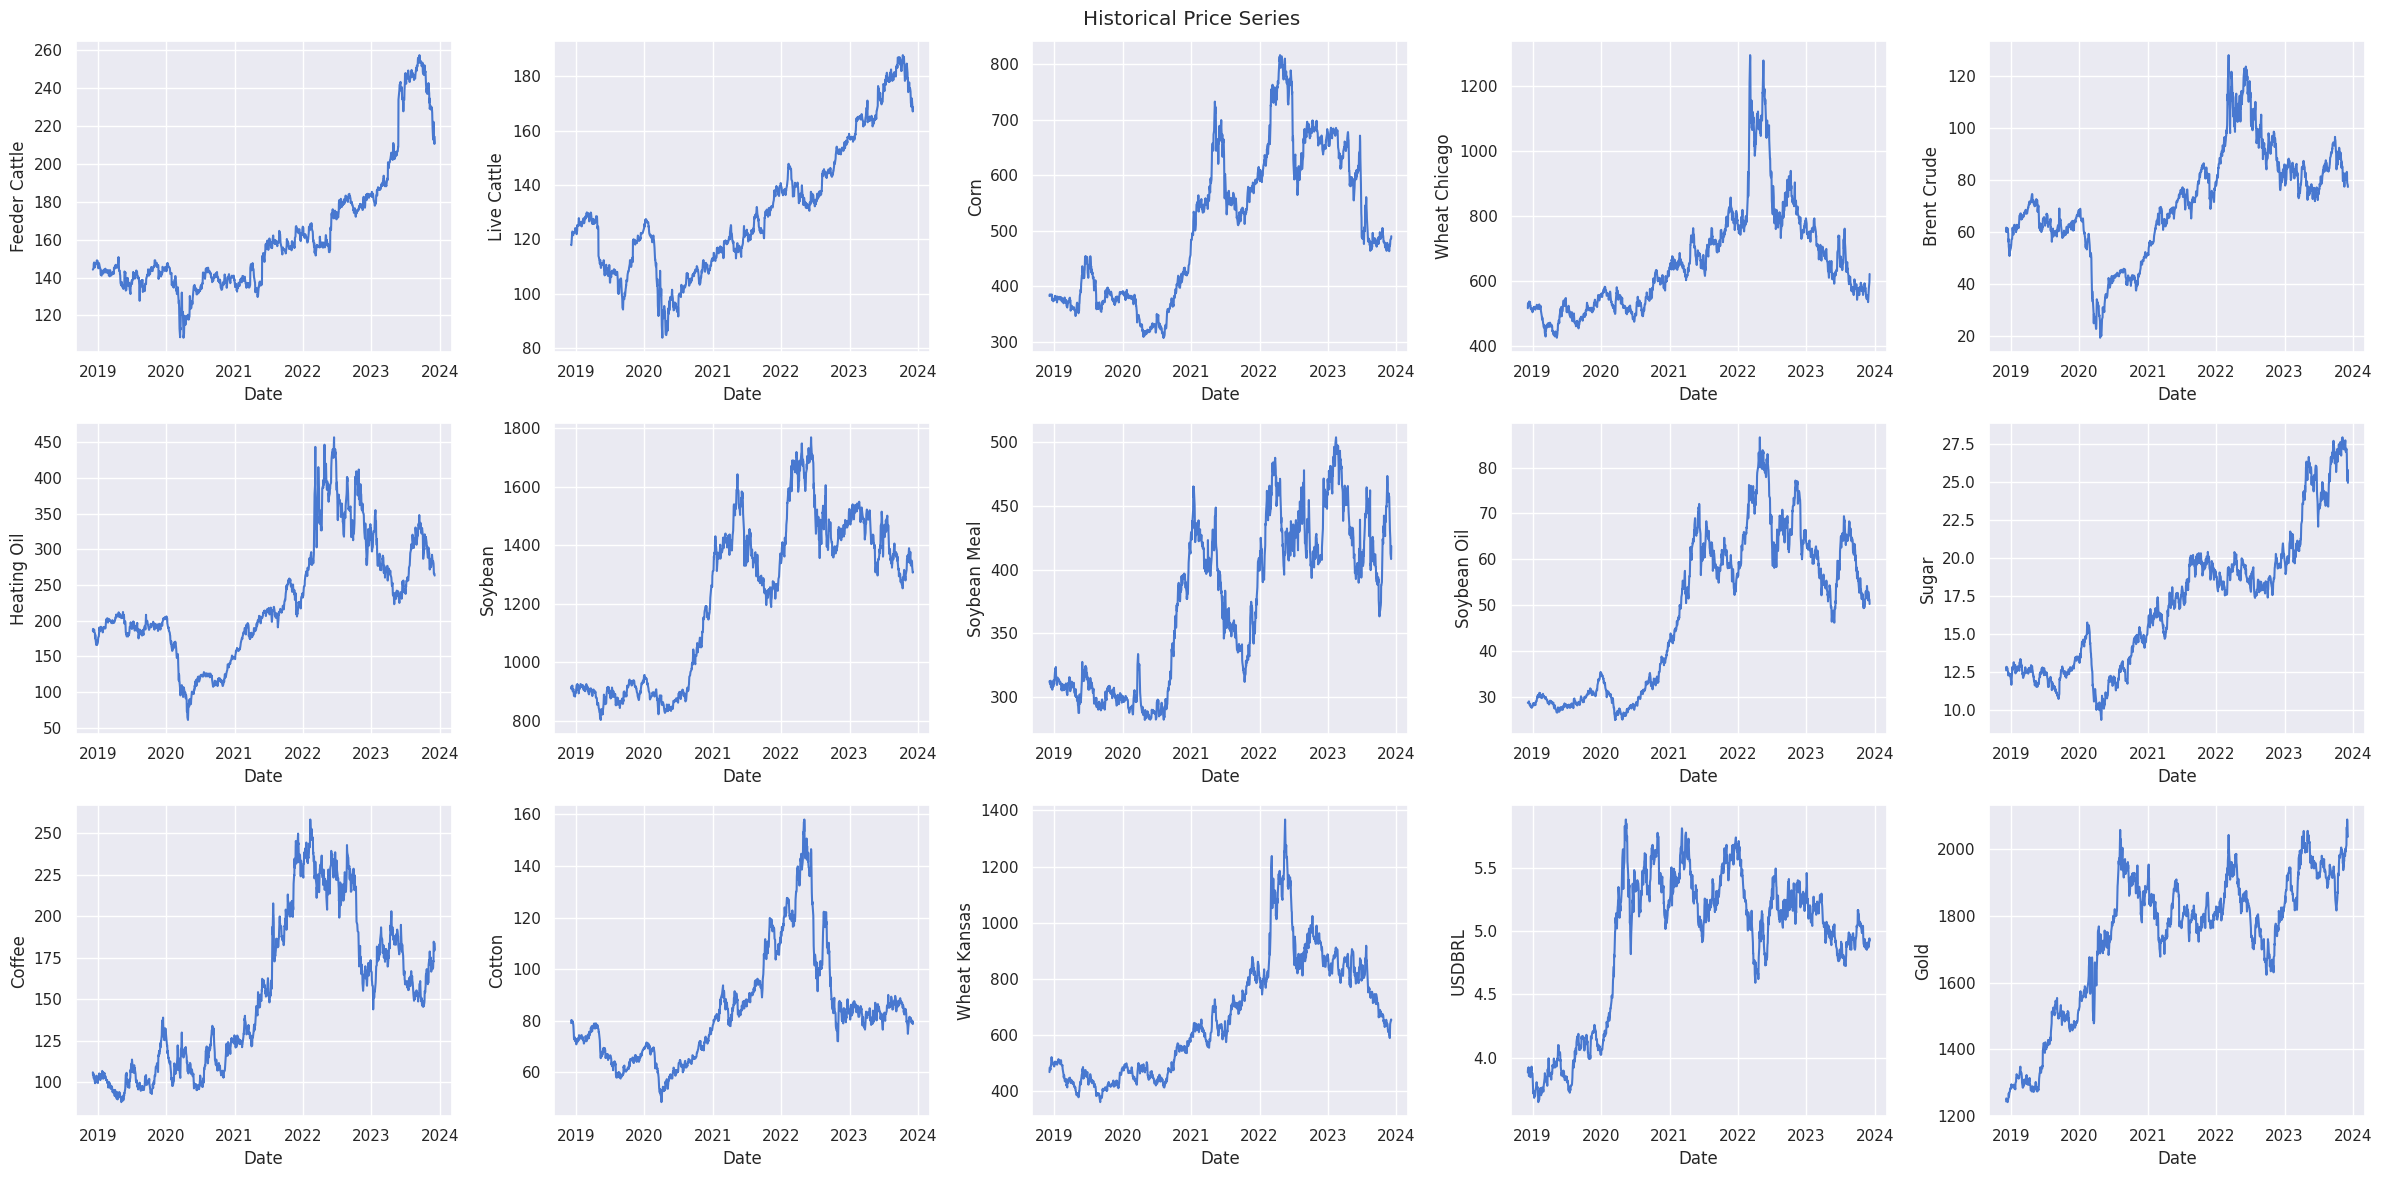

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (24,12))#creates the figure and the axes

sns.lineplot(x = 'Date', y = 'Feeder Cattle', data = data, ax = axs[0][0])
sns.lineplot(x = 'Date', y = 'Live Cattle', data = data, ax = axs[0][1])
sns.lineplot(x = 'Date', y = 'Corn', data = data, ax = axs[0][2])
sns.lineplot(x = 'Date', y = 'Wheat Chicago', data = data, ax = axs[0][3])
sns.lineplot(x = 'Date', y = 'Brent Crude', data = data, ax = axs[0][4])
sns.lineplot(x = 'Date', y = 'Heating Oil', data = data, ax = axs[1][0])
sns.lineplot(x = 'Date', y = 'Soybean', data = data, ax = axs[1][1])
sns.lineplot(x = 'Date', y = 'Soybean Meal', data = data, ax = axs[1][2])
sns.lineplot(x = 'Date', y = 'Soybean Oil', data = data, ax = axs[1][3])
sns.lineplot(x = 'Date', y = 'Sugar', data = data, ax = axs[1][4])
sns.lineplot(x = 'Date', y = 'Coffee', data = data, ax = axs[2][0])
sns.lineplot(x = 'Date', y = 'Cotton', data = data, ax = axs[2][1])
sns.lineplot(x = 'Date', y = 'Wheat Kansas', data = data, ax = axs[2][2])
sns.lineplot(x = 'Date', y = 'USDBRL', data = data, ax = axs[2][3])
sns.lineplot(x = 'Date', y = 'Gold', data = data, ax = axs[2][4])

fig.suptitle('Historical Price Series')#Whole figure's title
plt.tight_layout()#automatically fit the plots to the figure (to prevent errors)
fig.show()

An initial graphical analysis of asset's historical price series, mainly identifing if there is any anomaly in a specific point in time. As we can see, there is not much beyond common in the prices. In COVID-19's pandemic period, its possible to notice that there were distinct behaviors between assets, because of its idiosyncratic technical features, as we see Gold and USDBRL rising their price's floors, because of being consideted value reserves.

#Strategy: pairs trading with cointegration

The strategy used in here will be the pairs trading based in cointegration processes, which, intuitively, search for two assets with stationary spreads, therefore, has a mean reversion process.

Therefore, the work will consist in identifing cointegrated asset pairs, calculate its spread and its z-score, obteining the parameters that will generate entry and out signals for the trade.

The thesis that supports the application of this strategy is that the given assets are commodities, therefore are extremely affected by global supply and demand structure, obviously each one with their own particularities. If there are pairs with strong correlation between its markets, like the two kinds of wheat and cattle its possible that they are cointegrated, because, assuming that there are no estrucutral change in the variables that affects its prices (like supply and demand, technology, laws), its spread should inhabit a certain bandwith following a mean reversion process.

##Correlation analysis


Correlations, despite changing over time, function as a tool for a first analysis. This analysis, will help to understand the basic relationship between assets and substantiate the pair choice.

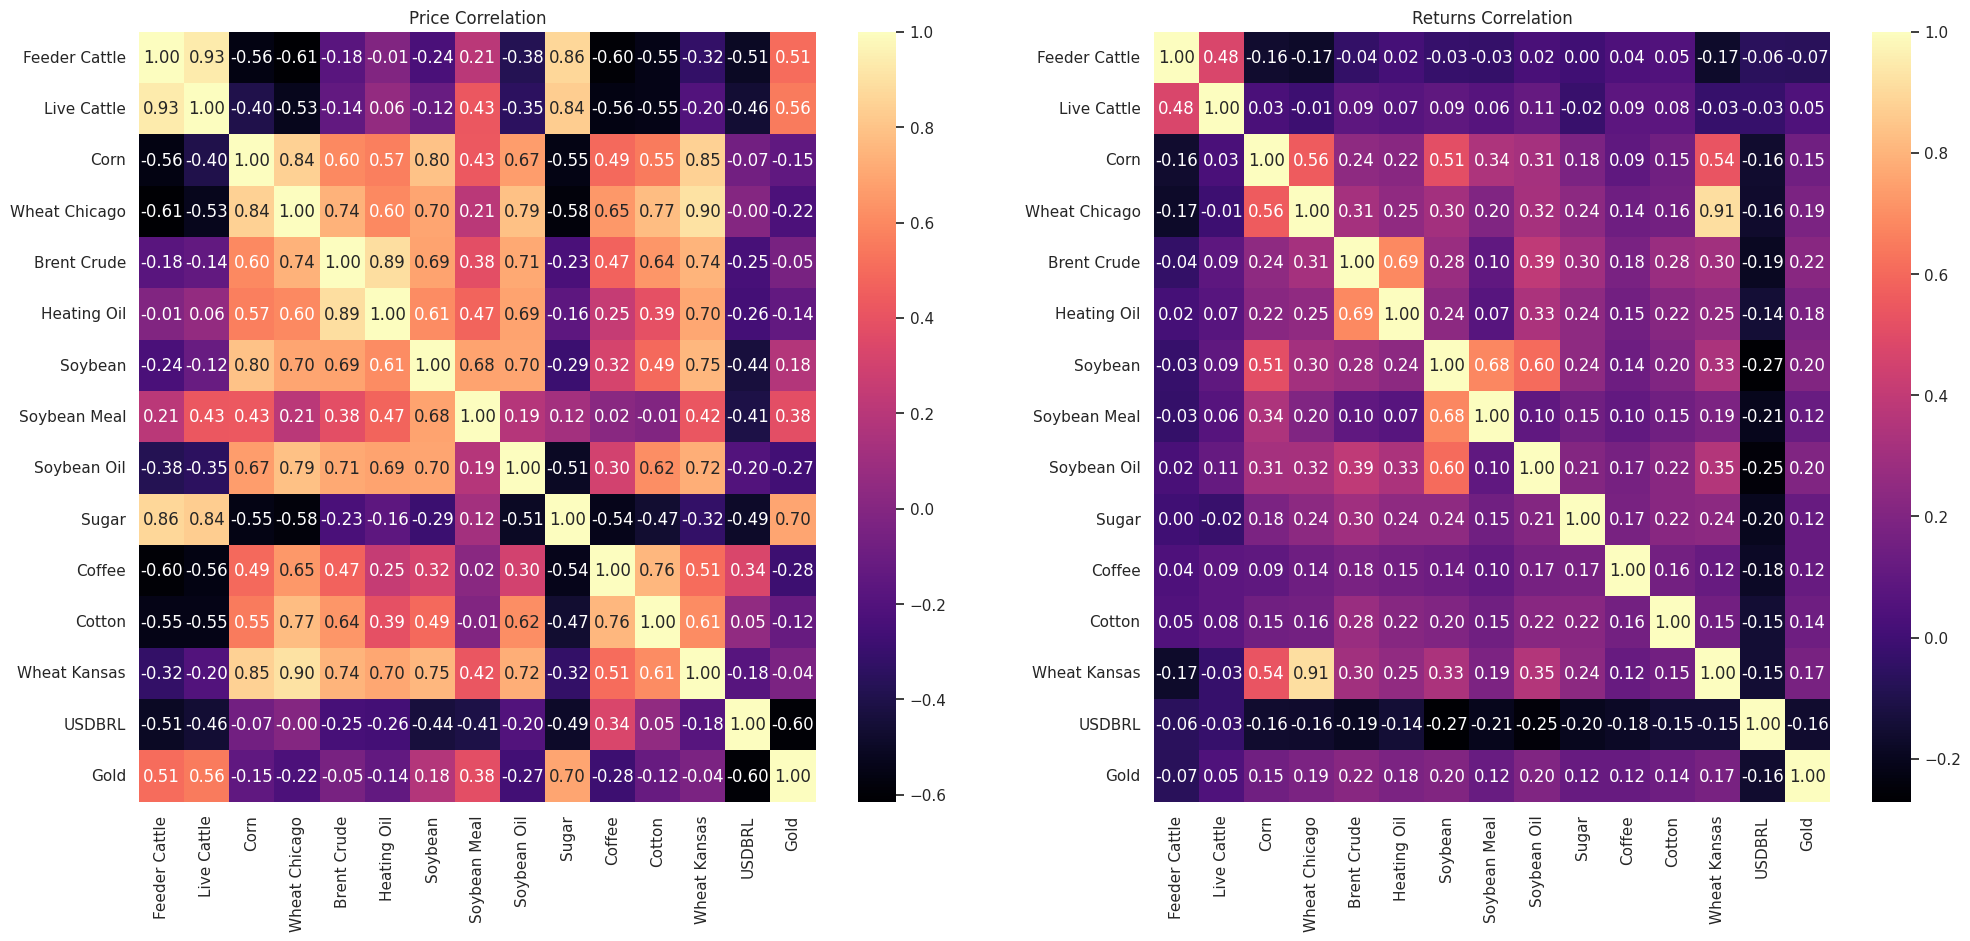

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24,10))
sns.heatmap(
            data = train.corr(method ='pearson'), #correlation matrix heatmap
            ax = axs[0],
            cmap='magma',
            annot=True,
            fmt=".2f"
)

sns.heatmap(
            data = train.pct_change().corr(method ='pearson'), #correlation matrix heatmap
            ax = axs[1],
            cmap='magma',
            annot=True,
            fmt=".2f"
)
axs[0].set_title('Price Correlation')
axs[1].set_title('Returns Correlation')
fig.show()

As we can see, there are pairs with strong positive price correlations, like Feeder and Live Cattle, Wheat Chigago and Kansas, Feeder Cattle and Sugar, as an example.

But, this relation does not hold when we look to returns correlations, which might indicate that the assest's price changes are more isolated and specific of its own market. That said, some assets still hold significant return correlation, like Wheat Chicago and Kansas, Corn and Wheat Kansas, Brent Crude and Heating Oil, Soybean Meal and Soybean.

These correlations may be a lead that there are cointegrated pairs in this dataset and help to substantiate its choices.

##Testing for cointegration between pairs by Engle & Granger (EG) test

[('Wheat Chicago', 'Cotton'), ('USDBRL', 'Gold')]


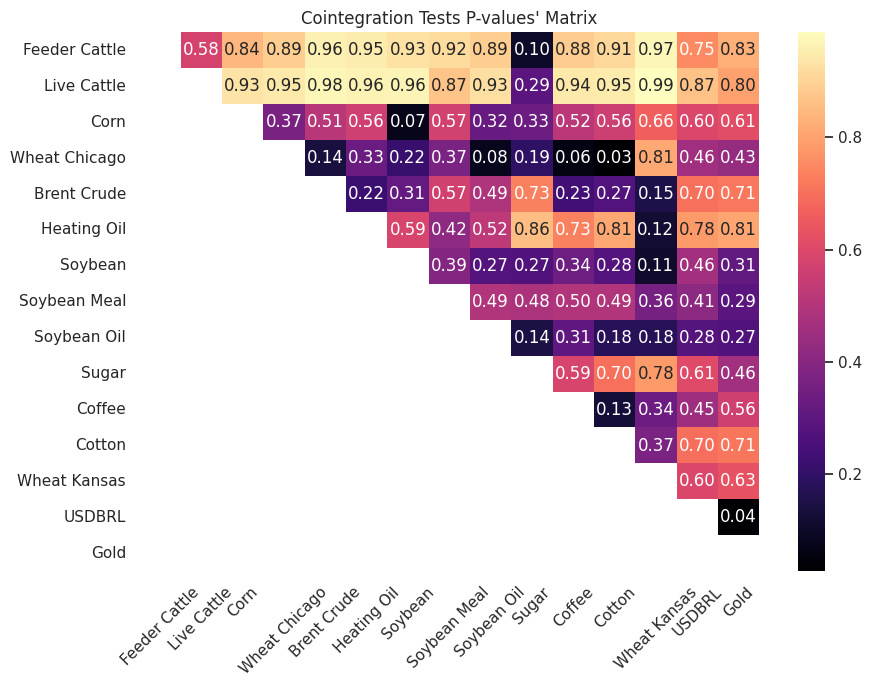

In [ ]:
# Function to find cointegrated pairs
def coint_pairs(dataframe):
    n = dataframe.shape[1]
    pvalue_matrix = np.ones((n, n))
    columns = dataframe.columns
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(dataframe[columns[i]], dataframe[columns[j]])#run cointegration test for each pair
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((columns[i], columns[j]))#takes pairs that reject null hypothesis

    return pvalue_matrix, pairs

# Appling the function and visualizing p-values
pvalues, pairs = coint_pairs(train)
print(pairs)
with sns.axes_style("white"):#defines a local theme
  fig, ax = plt.subplots(figsize=(10,7))
  sns.heatmap(pvalues, #heatmap to visualize p-values
              xticklabels = train.columns,
              yticklabels = train.columns,
              cmap = 'magma',
              annot = True,
              fmt=".2f",
              mask = (pvalues >= 0.99))
  plt.xticks(rotation=45)
  ax.set_title("Cointegration Tests P-values' Matrix")

The `coint()` function of statsmodels library performs the EG test for any pair of assets. After performing this test for all the pairs, we can see that there are only two pairs which we have evidence on a 95% confidence level that there is a cointegration process. They are Wheat Chicago and Cotton, USDBRL and Gold.

##Visualizing pairs' price series

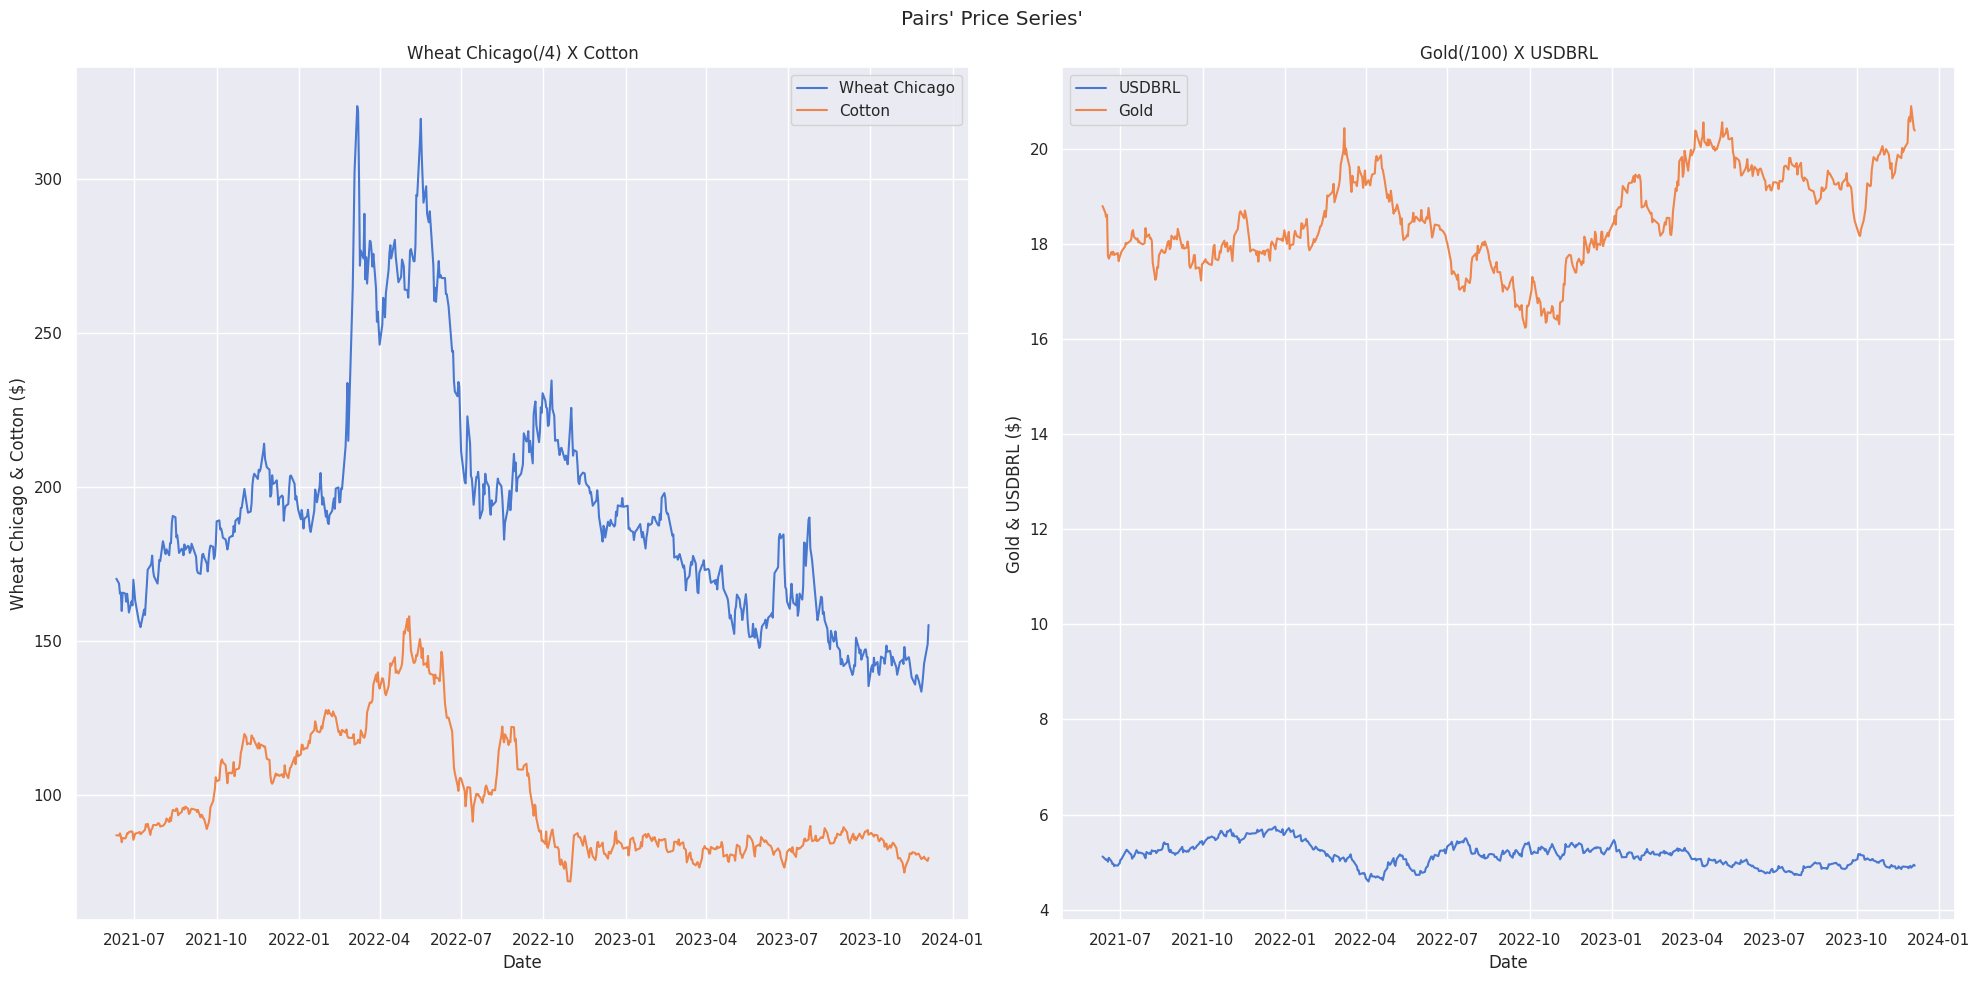

In [ ]:
#Pairs plot
fig, axs = plt.subplots(figsize = (20, 10), nrows = 1, ncols = 2)#creates figures

sns.lineplot(x = 'Date', y = train['Wheat Chicago']/4, data = train, ax = axs[0], label = 'Wheat Chicago')
sns.lineplot(x = 'Date', y = 'Cotton', data = train, ax = axs[0], label = 'Cotton')#plots
sns.lineplot(x = 'Date', y = 'USDBRL', data = train, ax = axs[1], label = 'USDBRL')
sns.lineplot(x = 'Date', y = train['Gold']/100, data = train, ax = axs[1], label = 'Gold')

axs[0].set_title('Wheat Chicago(/4) X Cotton')#extra elements
axs[0].set_ylabel('Wheat Chicago & Cotton ($)')
axs[0].legend(loc = 'upper right')

axs[1].set_title('Gold(/100) X USDBRL')
axs[1].set_ylabel('Gold & USDBRL ($)')
axs[1].legend(loc = 'upper left')

fig.suptitle("Pairs' Price Series'")#Whole figure title
plt.tight_layout()#automatically fit the plots to the figure (to prevent errors)
fig.show()

*obs: some prices where scaled down with the pourpose of better visualization.*

With this analysis, we can see that the first pair has a stronger correlation than the second, which is confirmed by the correlation matrix done before.

Despite both pairs are cointegrated, it might be that the first yields better results.

#Appling the strategy

##Calculating the Spread

In the strategy, the spread betwen assets pairs will be cointegrated and have a mean reversion process, based on that we will get the entry and out signals for the pairs trading.

The spread will be calculated by the following method: (asset 1's price) - b * (assest 2's price). In which b is the beta or angular coefficient of a simple linear regression of the assets.

###Wheat Chicago and Cotton

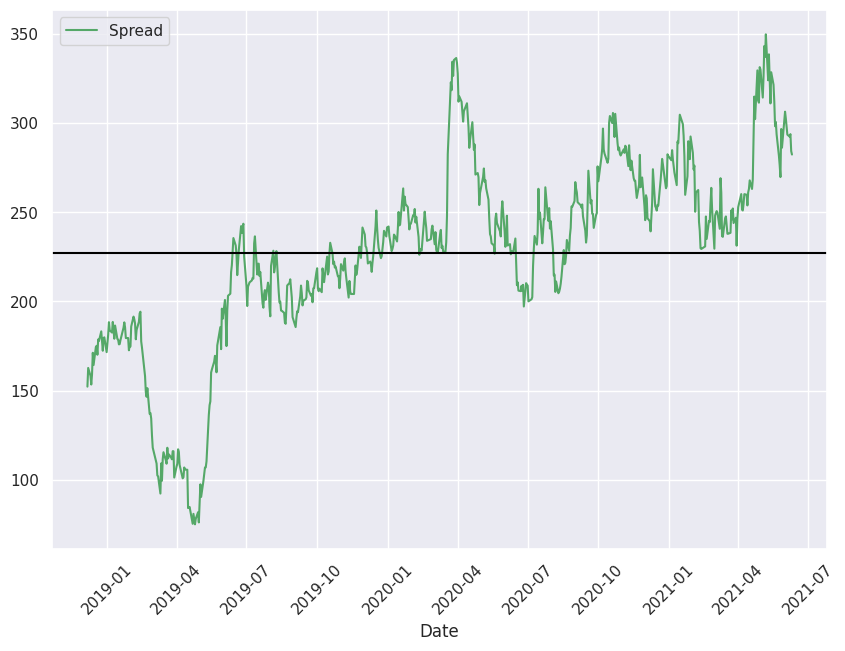

In [ ]:
#Calculating the spread
cotton = test['Cotton']
cotton = add_constant(cotton)#adds constant column for regression
wheat = test['Wheat Chicago']
ols1 = OLS(wheat, cotton).fit()#OLS regression to find beta
cotton = cotton['Cotton']
b1 = ols1.params['Cotton']

spread1 = wheat - b1 * cotton#calculates the spread

#plotting the spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread1, label = 'Spread', c = 'g')

plt.axhline(spread1.mean(), color='black')
plt.legend()
plt.xticks(rotation = 45)
fig.show()

###Gold and USDBRL

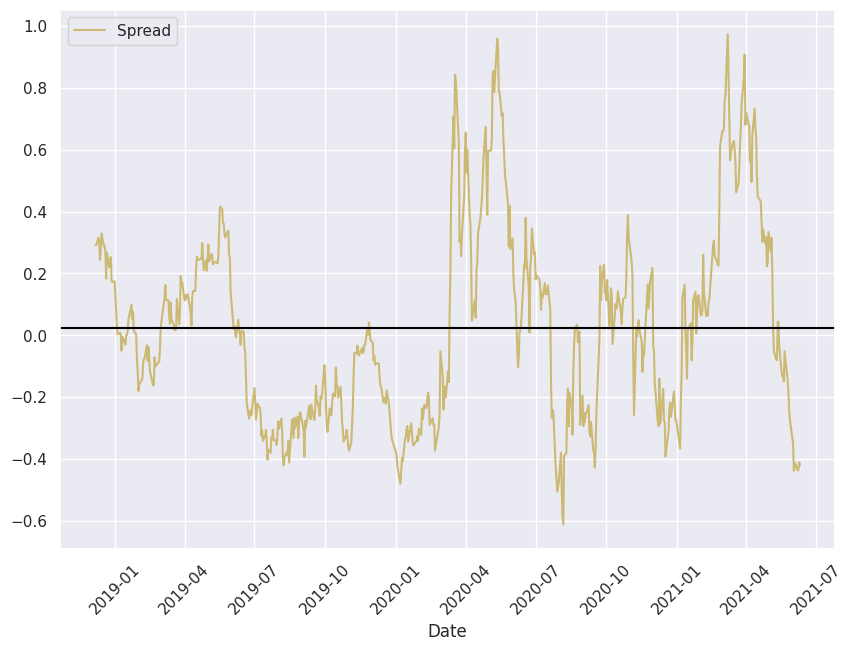

In [ ]:
#Calculating the spread
gold = test['Gold']
gold = add_constant(gold)#adds constant column for regression
usdbrl = test['USDBRL']
ols2 = OLS(usdbrl, gold).fit()#OLS regression to find beta
gold = gold['Gold']
b2 = ols2.params['Gold']

spread2 = usdbrl - b2 * gold#calculates the spread

#plotting the spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread2, label = 'Spread', c = 'y')

plt.axhline(spread2.mean(), color='black')
plt.legend()
plt.xticks(rotation = 45)
fig.show()

##Moving averages

To enrich the analysis, its possible to use the moving averages tool to describe the normalized or gaussian spread, this way we have a cleaner spread that captures better the prices' dynamics in the moment, without being contaminated by the whole sample.

###Wheat Chicago and Cotton

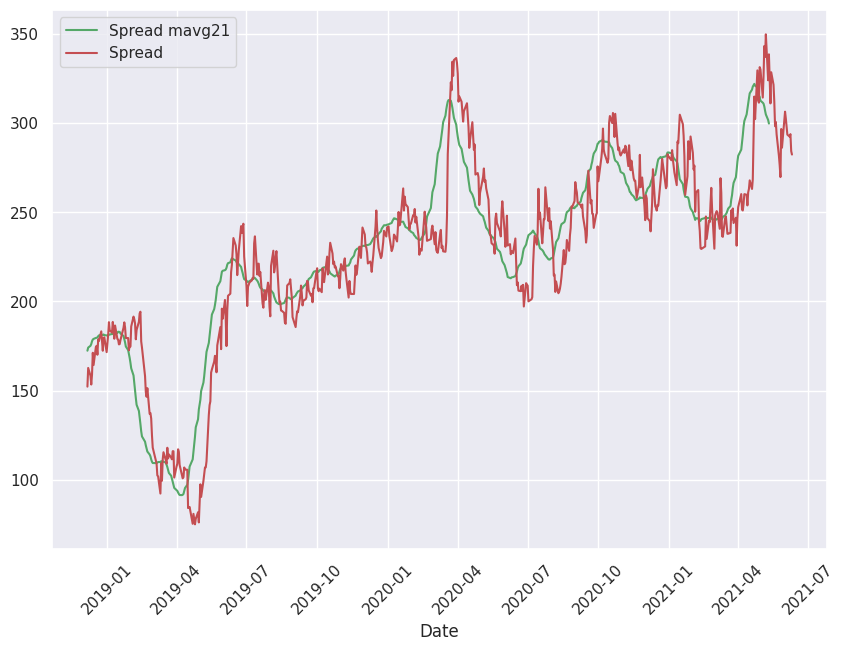

In [ ]:
#21 days moving averages
spread1_mavg21 = spread1.rolling(21).mean()

#Visualizing moving average and spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread1_mavg21, label = 'Spread mavg21', c = 'g')
sns.lineplot(data = spread1, label = 'Spread', c = 'r')

plt.legend()
plt.xticks(rotation = 45)
fig.show()

###Gold and USDBRL

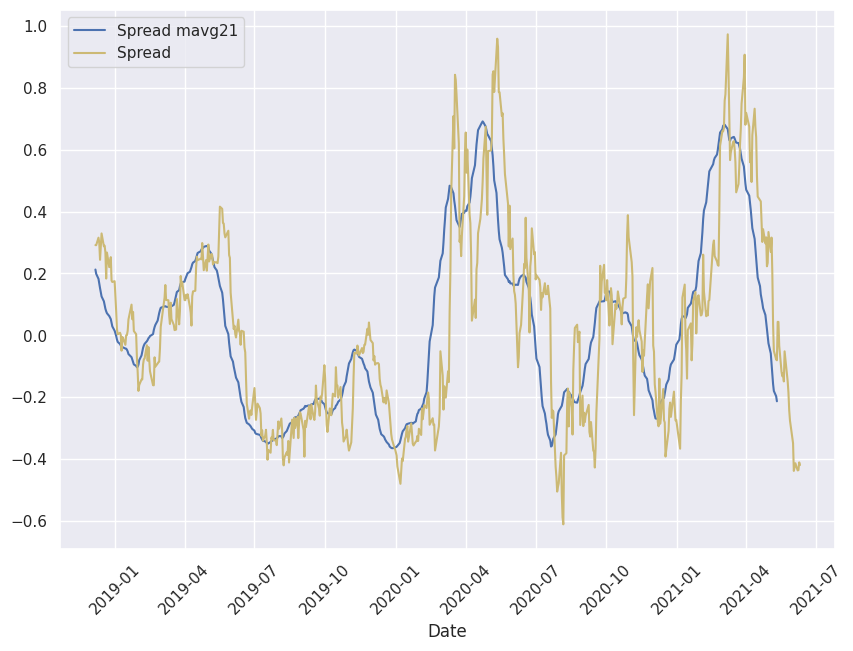

In [ ]:
#21 days moving averages
spread2_mavg21 = spread2.rolling(21).mean()

#Visualizing moving average and spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread2_mavg21, label = 'Spread mavg21', c = 'b')
sns.lineplot(data = spread2, label = 'Spread', c = 'y')

plt.legend()
plt.xticks(rotation = 45)
fig.show()

The chosen window was 21 days, because it is the mean number of business day in a month. As we can see, the 21 days moving average smoothens the spread's moviment. Addtionally, it will provide a more updated and clean information while calculating the spread's z-score in comparison to using the whole sample's mean.

##Z-score

###Wheat Chicago and Cotton

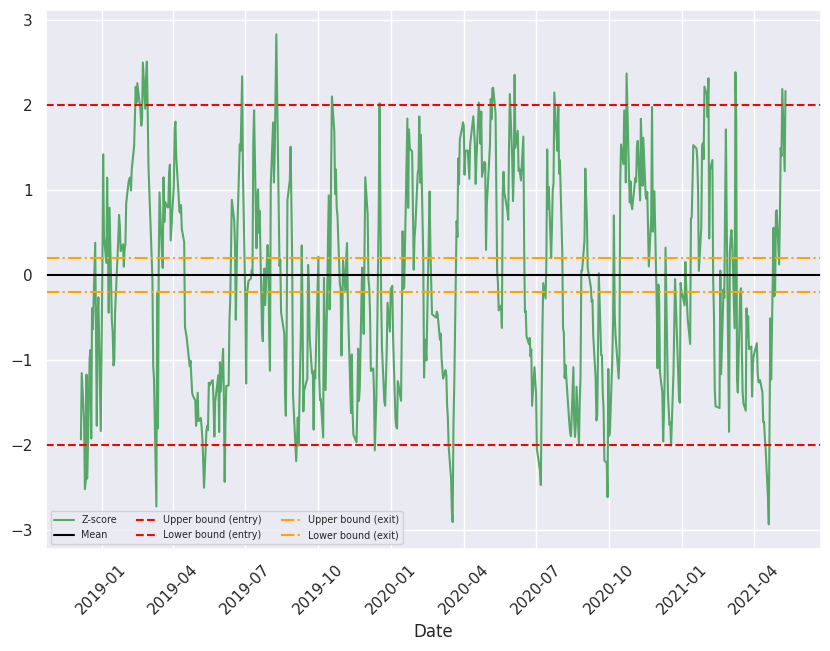

In [ ]:
#21 days moving standard deviation
std1_21 = spread1.rolling(21).std()

#Z-score calculation for each day
zscore1_21 = (spread1 - spread1_mavg21)/std1_21

#Visualizing z-score and strategy for the pair
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = zscore1_21, label = 'Z-score', c = 'g')

plt.axhline(0, color='black', label = 'Mean')
plt.axhline(2.0, color='red', linestyle='--', label = 'Upper bound (entry)')
plt.axhline(-2.0, color='red', linestyle='--', label = 'Lower bound (entry)')#Spread's variation bandwith
plt.axhline(0.2, color='orange', linestyle='-.', label = 'Upper bound (exit)')
plt.axhline(-0.2, color='orange', linestyle='-.', label = 'Lower bound (exit)')

plt.legend(loc ='lower left', ncols = 3, fontsize = 'xx-small')
plt.xticks(rotation = 45)
fig.show()

###Gold and USDBRL

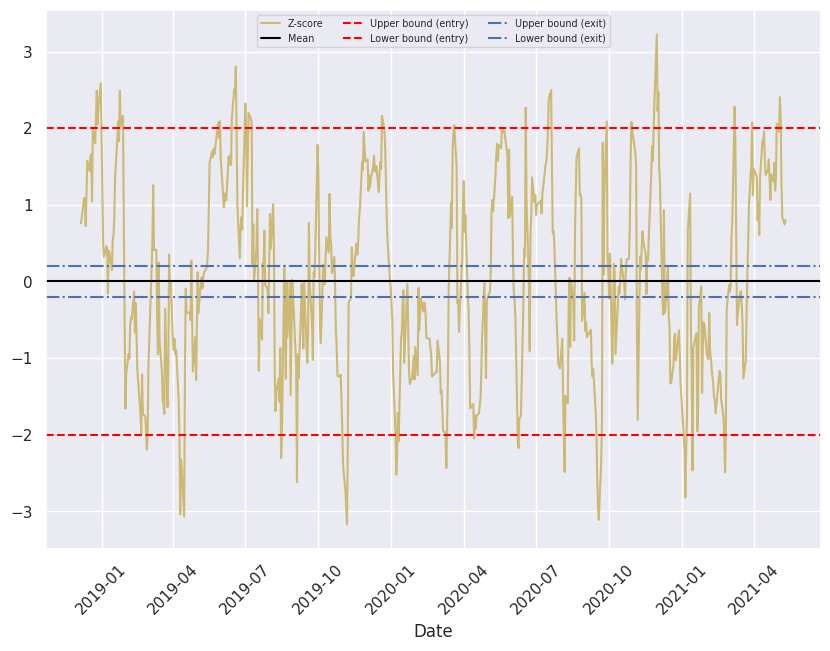

In [ ]:
#21 days moving standard deviation
std2_21 = spread2.rolling(21).std()

#Z-score calculation for each day
zscore2_21 = (spread2 - spread2_mavg21)/std2_21

#Visualizing z-score and strategy for the pair
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = zscore2_21, label = 'Z-score', c = 'y')

plt.axhline(0, color='black', label = 'Mean')
plt.axhline(2.0, color='red', linestyle='--', label = 'Upper bound (entry)')
plt.axhline(-2.0, color='red', linestyle='--', label = 'Lower bound (entry)')#Spread's variation bandwith
plt.axhline(0.2, color='b', linestyle='-.', label = 'Upper bound (exit)')
plt.axhline(-0.2, color='b', linestyle='-.', label = 'Lower bound (exit)')

plt.legend(loc ='upper center', ncols = 3, fontsize = 'xx-small')
plt.xticks(rotation = 45)
fig.show()

##The trade

With the z-score calculated and visualized, its possible to perform the trade. We know that the spreads are cointegrated and have a mean reversion process.

This way, when the spread reaches values that are considered extremes, we long or short the strategy, depending on the signal. In the following way:

*   Spread value greater than 2 (upper entry bound): short the spread, i.e. short Wheat Chicago and long Cotton (pair 1) and short USDBRL and long Gold (pair 2).

*   Spread value lower than -2 (lower entry bound): long the spread, i.e. long Wheat Chicago and short Cotton (pair 1) and long USDBRL and short Gold (pair 2).

The exit signal happens in a similar fashion. After we entered the trade, when the spread hits a value inside the exit bandwith, it will be the moment of transacting the position. The reason for that is that the values in this bandwith are close enough to the mean so that the mean reversion processes is considered done. Like in the following:

*  Spread values between 0.2 and -0.2 (upper and lower exit bounds): transact the position.


Its worth noting, that the bandwith values are arbitrary and should be optmized to the pair situation. The entry values chosen here are based on the hypotesis that tha spread follows a gaussian distribution, therefore the two standard deviations from the mean should represent most of the values drawn from that distribution, i.e. values out of the bounds are considered extremes and indicates the beginning of a mean reversion process. The exit bounds were defined as 10% of entry bounds, arbitrary.

Also, the bandwiths have a effect on the amount of trades, hence, in the trasaction cost, because the lower the entry bounds are and the higher exit bounds are, bigger the amount of trades will be, therefore the transaction cost. The model here does not include transaction costs, but in real cases they should be implemented.

#References

*   https://www.quantrocket.com/code/?repo=quant-finance-lectures&path=%2Fcodeload%2Fquant-finance-lectures%2Fquant_finance_lectures%2FLecture42-Introduction-to-Pairs-Trading.ipynb.html
*   https://medium.com/analytics-vidhya/statistical-arbitrage-with-pairs-trading-and-backtesting-ec657b25a368
*   https://wilsonfreitas.github.io/estrategias-de-trading/pdf/cointegration-tests.pdf

*   https://quantbrasil.com.br/aprenda-a-estrategia-de-long-and-short-por-cointegracao/

*   https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/02-Moving-Average-and-ARMA-Models.html#:~:text=from%20statsmodels.tsa.arima_process%20import%20ArmaProcess%20%23%20build%20a%20list,AR_object.generate_sample%28nsample%3D5000%29%20%23%20Plot%20the%20ACF%20plot_acf%28simulated_data%2C%20lags%3D30%29%3B%20plt.savefig%28%27..%2Fimages%2Farma_acf.png%27%29

*   https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing/
*   https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html


*   https://www.statsmodels.org/devel/generated/statsmodels.tools.tools.add_constant.html


*   https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html


*   https://seaborn.pydata.org/tutorial/aesthetics.html

*   https://seaborn.pydata.org/tutorial/color_palettes.html
*   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots





